### Importing the necessary Libraries

In [555]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import datetime

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

### Importing the data

In [556]:
data = pd.read_csv('C:/Users/ritaf/Documents/GitHub/CP/Capstone/No_show_prediction/medical-appointments-no-show-en.csv')

#### About our data

Our data was regards information about aspects that influence patients to attend or not their booked appointments. These are the features it contains:

- "Specialty": specialty that patient received the treatment;
- "Appointment Time": appointment time scheduled;
- "Gender": male or female gender of the patient;
- "Appointment Date": appointment date scheduled;
- "No-show": given whether the patient attended the scheduled appointment or not;
- "No-show Reason": description of the reason why the patient did not attend the scheduled appointment;
- "Disability”: the patient’s motor or intellectual disability;
- "Date of Birth": the patient’s date of birth;
- "Date of Entry into the Service": date of the patient’s first appointment at the CER;
- "City": city where the patient resides;
- "ICD": identifier of the patient’s disease;
- "Appointment Month";
- "Appointment Year";
- "Appointment Shift";
- "Age": patient's age;
- "Under 12 years old": patient's age under 12 years old;
- "Over 60 years old": patient's age over 60 years old;
- "Patient needs companion": patient's needs companion to go to the appointment;
- "Average Temperatura Day": Average temperatura in the day of the appointment;
- "Average Rain Day": Average rain in the day of the appointment;
- "Max Temperature Day": Maximum temperature in the day of the appointment;
- "Max Rain Day": Maximum rainfall in the day of the appointment;
- "Storm Day Before": Heavy rain in the day before the appointment;
- "Rain Intensity": no rain, weak, moderate or heavy rain in the day of the appointment;
- "Heat Intensity": cold, heavy cold, warm, heavy warm or mild in the day of the appointment.

This dataset can be accessed though the following link: https://data.mendeley.com/datasets/wm6w2fvkfj/1


## Data preprocessing

Taking an initial look at our dataframe

In [557]:
data.head()
# We have 49593 rows

,specialty,appointment_time,gender,appointment_date,no_show,no_show_reason,disability,date_of_birth,entry_service_date,city,...,over_60_years_old,patient_needs_companion,average_temp_day,average_rain_day,max_temp_day,max_rain_day,rainy_day_before,storm_day_before,rain_intensity,heat_intensity
0,physiotherapy,13:20,M,09/09/2021,yes,surto,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
1,psychotherapy,13:20,M,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
2,speech therapy,13:20,F,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
3,physiotherapy,13:20,F,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
4,physiotherapy,14:00,M,09/09/2021,no,NaN,motor,10/10/1954,5/2/2020,B. CAMBORIU,...,1,1,20.75,0.01,23.7,0.2,1,1,no_rain,mild


In [558]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49593 entries, 0 to 49592
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   specialty                42139 non-null  object 
 1   appointment_time         49593 non-null  object 
 2   gender                   49593 non-null  object 
 3   appointment_date         49593 non-null  object 
 4   no_show                  49593 non-null  object 
 5   no_show_reason           1737 non-null   object 
 6   disability               44456 non-null  object 
 7   date_of_birth            39272 non-null  object 
 8   entry_service_date       44438 non-null  object 
 9   city                     44412 non-null  object 
 10  icd                      10717 non-null  object 
 11  appointment_month        49593 non-null  object 
 12  appointment_year         49593 non-null  int64  
 13  appointment_shift        49593 non-null  object 
 14  age                   

From the previous output we can see that:
- Some columns can be delete, like the date_of_birth as we already have age, and appointment_shift as we already have the appointment time
- There are some columns (__no_show_reason__  and __idc__) with a high number of invalid values which we will proceed to drop.
- Some columns must be converted to other data types 

#### Dropping troublesome columns

In [559]:
data.drop(['no_show_reason', 'icd', 'date_of_birth', 'appointment_shift'], axis = 1, inplace = True)
# ICD é o código da doença

#### Missing values

Dropping the remaining null values from the remaining columns

In [560]:
data.dropna(inplace = True)
# ficamos com 34607 rows (dropamos 14986)

In [561]:
data.isna().any()

specialty                  False
appointment_time           False
gender                     False
appointment_date           False
no_show                    False
disability                 False
entry_service_date         False
city                       False
appointment_month          False
appointment_year           False
age                        False
under_12_years_old         False
over_60_years_old          False
patient_needs_companion    False
average_temp_day           False
average_rain_day           False
max_temp_day               False
max_rain_day               False
rainy_day_before           False
storm_day_before           False
rain_intensity             False
heat_intensity             False
dtype: bool

There are no more missing values

In [562]:
data = data.reset_index(drop=True)

#### Features encoding 

Encoding some categorical features

In [563]:
# # Specify the columns to be one-hot encoded
# columns_to_encode = ['specialty', 'gender', 'disability']

# # Create a ColumnTransformer with OneHotEncoder for specified columns
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('onehot', OneHotEncoder(), columns_to_encode)
#     ],
#     remainder='passthrough'  # Passthrough other columns not specified for encoding
# )

# # Fit and transform the data
# df_encoded = preprocessor.fit_transform(data)

# # Convert the result back to a DataFrame (optional)
# df_encoded = pd.DataFrame(df_encoded, columns=list(preprocessor.get_feature_names_out()))

# # Concatenate the original DataFrame and the encoded DataFrame
# data = pd.concat([data.reset_index(drop=True), df_encoded], axis=1)

In [564]:
# Specify the columns to be one-hot encoded
columns_to_encode = ['specialty', 'gender', 'disability']

# Create a OneHotEncoder
encoder = OneHotEncoder(sparse=False, dtype=int)

# Fit and transform the specified columns
df_encoded = encoder.fit_transform(data[columns_to_encode])

# Convert the result back to a DataFrame
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(columns_to_encode))

# Reset the index of the original DataFrame
data = data.reset_index(drop=True)

# Concatenate the original DataFrame and the encoded DataFrame
data = pd.concat([data, df_encoded], axis=1)

# Drop the original columns that were one-hot encoded
data = data.drop(columns=columns_to_encode, axis=1)



In [565]:
distances = {'B. CAMBORIU': 12.3,
             'ITAJAÍ': 2.4,
             'CAMBORIU': 14.2,
             'NAVEGANTES': 6.3,
             'ILHOTA': 23,
             'BOMBINHAS': 49.1,
             'ITAPEMA': 27.1,
             'PORTO BELO': 39.3,
             'PENHA': 28,
             'LUIZ ALVES': 44,
             'BALN. PIÇARRAS': 26.3
          }

data['distances (km)'] = data['city'].map(distances)
data.drop(['city'], axis = 1, inplace = True)

In [566]:
temperature_mapping = {'heavy_cold': -2, 'cold': -1, 'mild': 0, 'warm': 1, 'heavy_warm': 2}
data['heat_intensity'] = data['heat_intensity'].map(temperature_mapping)

In [567]:
rainfall_mapping = {'no_rain': 0, 'weak': 1, 'moderate': 2, 'heavy': 3}
data['rain_intensity'] = data['rain_intensity'].map(rainfall_mapping)

In [568]:
data['no_show'] = data['no_show'].map({'yes': 1, 'no': 0})

#### Date features treatment

Transforming the appointment time into floats

In [569]:
data['appointment_time'] = data['appointment_time'].apply(lambda x: round(int(x.split(':')[0]) + int(x.split(':')[1]) / 60, 1))

Transforming the date of service entry into the patient's antequity

In [570]:
# entry service day into date format
data['entry_service_date'] = pd.to_datetime(data['entry_service_date'], format="%d/%m/%Y", errors='coerce')

# there are some incorrectly represented dates, so we drop them
data = data.dropna(subset=['entry_service_date'])

# creating customer antequity feature
data['patient_antequity'] = pd.to_datetime('now') - pd.to_datetime(data['entry_service_date'])
data['patient_antequity'] = data['patient_antequity'].dt.days

# drop the original feature
data.drop('entry_service_date', axis = 1, inplace = True)

data.reset_index(drop=True, inplace=True)

Creating the day of appointment column, since we already have the month and year columns

In [571]:
# creating the day of appointment column
data['appointment_day'] = pd.to_datetime(data['appointment_date'], format='%d/%m/%Y').dt.day

# we can now drop the appointment_date column
data.drop('appointment_date', axis=1, inplace = True)

Turning the appointment month into a numeric variable

In [572]:
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3,
                 'april': 4, 'may': 5, 'june': 6, 'july': 7, 'aug': 8,
                 'sept': 9, 'oct': 10, 'nov': 11, 'dec': 12}

data['appointment_month'] = data['appointment_month'].map(month_mapping)

#### Data types correction

In [573]:
data['appointment_year'] = data['appointment_year'].astype('int64')
data['age'] = data['age'].astype('int64')

In [574]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34239 entries, 0 to 34238
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   appointment_time                34239 non-null  float64
 1   no_show                         34239 non-null  int64  
 2   appointment_month               34239 non-null  int64  
 3   appointment_year                34239 non-null  int64  
 4   age                             34239 non-null  int64  
 5   under_12_years_old              34239 non-null  int64  
 6   over_60_years_old               34239 non-null  int64  
 7   patient_needs_companion         34239 non-null  int64  
 8   average_temp_day                34239 non-null  float64
 9   average_rain_day                34239 non-null  float64
 10  max_temp_day                    34239 non-null  float64
 11  max_rain_day                    34239 non-null  float64
 12  rainy_day_before                

#### Data distributions

In [575]:
data.describe().T.head(30)

,count,mean,std,min,25%,50%,75%,max
appointment_time,34239.0,12.658509,3.275160,7.00,9.20,13.30,15.50,18.30
no_show,34239.0,0.085429,0.279523,0.00,0.00,0.00,0.00,1.00
appointment_month,34239.0,6.676801,2.884215,1.00,4.00,7.00,9.00,12.00
appointment_year,34239.0,2017.700050,1.520999,2016.00,2017.00,2017.00,2019.00,2021.00
age,34239.0,18.854610,19.350849,2.00,8.00,11.00,16.00,110.00
under_12_years_old,34239.0,0.578872,0.493747,0.00,0.00,1.00,1.00,1.00
over_60_years_old,34239.0,0.092497,0.289730,0.00,0.00,0.00,0.00,1.00
patient_needs_companion,34239.0,0.671369,0.469722,0.00,0.00,1.00,1.00,1.00
average_temp_day,34239.0,19.568426,3.466628,8.94,17.29,19.92,22.02,27.10
average_rain_day,34239.0,0.181986,0.438737,0.00,0.00,0.01,0.14,4.77


There are two constant features: `rain_day_before` and `storm_day_before`, so we are dropping them

In [577]:
data.drop(['rainy_day_before', 'storm_day_before'], axis = 1, inplace = True)

## Exploratory Data Analysis

Checking the distribution of our target variable

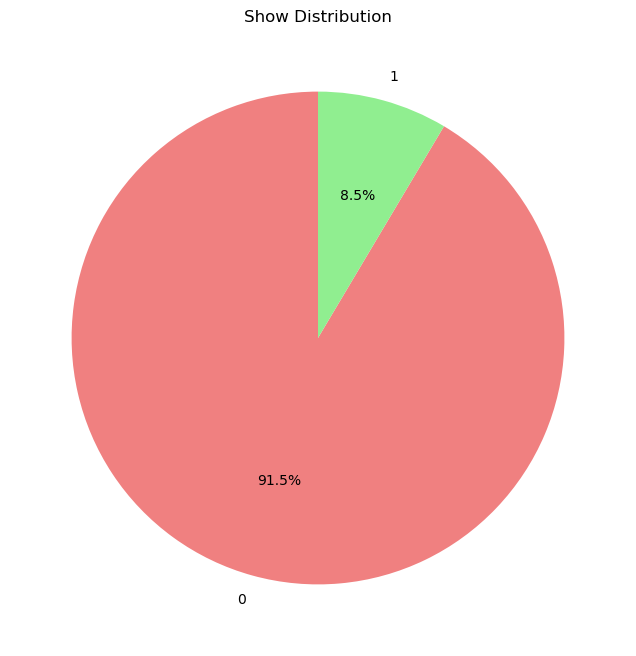

In [578]:
no_show_counts = data['no_show'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(no_show_counts, labels=no_show_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Show Distribution')
plt.show()


We have un unbalanced dataset, with a significante prevalence of patients who did attend their appointments

In [579]:
for column in data.columns:
    print(column, data[column].unique())

appointment_time [14.  14.7 15.3 16.3 17.  17.7 13.3  7.3  8.   8.7 10.3 11.  11.7  9.3
 13.5 16.7 16.  13.  15.   9.7  7.  16.6 13.8 15.5 18.2 17.4 14.8 15.7
 17.3  8.3  9.2 10.5 11.3  7.5 18.   7.8  9.5  8.8 10.8 12.3 14.3 17.2
 16.5 11.2 12.  13.2 15.8 10.   9.8 10.6 13.7 13.1 15.2 12.2 11.5 14.5
 16.2 10.2 10.7  8.2 18.3 17.6  9.1  8.5]
no_show [0 1]
appointment_month [ 9  8  7  6  5  4  3  2 12 11 10  1]
appointment_year [2021 2019 2018 2017 2016 2020]
age [ 68   5  11  28   9  25   7  51  15  52  79  56   3   8   6  42  14  10
  63  23  48   4  39  62  13  69  60  78  12  49  50  73  55  27  17  61
  19  30  58  80  33  70  16  29  31  65  87  64  21  59  38  22  46  67
  54  44  77  26  81  74  32  53  83  35  72  91 110  24  37 106  57  36
  34   2  18  75  82  66  41  86 108  76  47  43  20  71  45]
under_12_years_old [0 1]
over_60_years_old [1 0]
patient_needs_companion [1 0]
average_temp_day [20.75 19.39 18.25 19.15 16.28 18.41 16.63 12.25 20.4  16.4  20.5  20.14
 20.95 23.1

## Modelling

Fazer scaling / normalization

Ver quais são as variaveis mais importantes... aka feature selection

Fazer train test split

Construir modelos... 

In [580]:
# DE ML1

model = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 15, max_leaf_nodes = 50, min_samples_split = 25, max_features = 15, min_samples_leaf = 8), learning_rate = 0.085)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
predictions = model.predict(X_val)

metrics(y_train, train_pred, y_val, predictions)

model = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 15, max_leaf_nodes = 50, min_samples_split = 25, max_features = 15, min_samples_leaf = 8), learning_rate = 0.085)
model.fit(X, y)
print(accuracy_score(y, model.predict(X)))
predictions = model.predict(test)
# target['Canceled'] = predictions
# target.to_csv('C:\\Users\\Afonso Cadete\\O meu disco\\Universidade\\2nd year\\1st semester\\Machine Learning\\Project\\Group10_Version74.csv')

NameError: name 'AdaBoostClassifier' is not defined